# Let's define the library

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Let's define how many things you will classify

In [5]:
nb_classes = 10

# Let's receive the train and test datas

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Let's check the data using graph

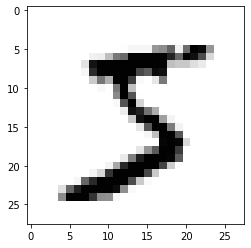

In [9]:
plt.imshow(x_train[0].reshape(28,28),cmap='Greys')

In [11]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1]*x_train.shape[2])

In [19]:
x_train.shape

(60000, 784)

In [20]:
x_train.max()

255

# Let's normalize for learning well

## Let's change integer to deciaml and normalization

In [22]:
x_train = x_train.astype('float32')/x_train.max()

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Let's make one-hot encoding

In [24]:
y_train = utils.to_categorical(y_train,nb_classes)

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Let's change the test datas like train datas

In [26]:
x_test = x_test.reshape(x_test.shape[0],
                       x_test.shape[1]*x_test.shape[2])

In [27]:
x_test = x_test.astype('float32')/255

In [30]:
y_test = utils.to_categorical(y_test,nb_classes)

# Let's make 1 layer sequence model

### Multinominal classification problem use softmax and cross entropy

In [33]:
model = Sequential()
model.add(Dense(nb_classes,input_dim=784))
model.add(Activation('softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Let's use categorical cross entropy 

In [36]:
model.compile(loss ="categorical_crossentropy",
             optimizer='sgd',metrics = ['accuracy'])

In [37]:
history = model.fit(x_train,y_train,epochs =15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 127us/sample - loss: 0.7791 - accuracy: 0.8162
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4569 - accuracy: 0.8804
Epoch 3/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4038 - accuracy: 0.8909
Epoch 4/15
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3772 - accuracy: 0.8969
Epoch 5/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3605 - accuracy: 0.9010
Epoch 6/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3486 - accuracy: 0.9039
Epoch 7/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3396 - accuracy: 0.9057
Epoch 8/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3323 - accuracy: 0.9078
Epoch 9/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3265 - accuracy: 0.9095
Epoch 10/15

# Let's evaluate

In [38]:
score = model.evaluate(x_test,y_test)
print(score)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.2944 - accuracy: 0.9190
[0.2944114541530609, 0.919]


# Total Codes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
nb_classes = 10
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[0].reshape(28,28),cmap='Greys',interpolation='nearest')
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]
                          *x_train.shape[2])
x_train = x_train.astype('float32')/x_train.max()
y_train = utils.to_categorical(y_train,nb_classes)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_test = x_test.astype('float32')/255
y_test = utils.to_categorical(y_test,nb_classes)
model = Sequential()
model.add(Dense(nb_classes, input_dim=784))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=15)
score = model.evaluate(x_test,y_test)
print(score[1])